Draw bounding boxes on images using the coordinate system that tensorflow adopt. This uses relative potiion to top left hand corener of image. PIL instead uses pixel position, but this depends on the image size. Therefore using relative position is better for tracking location of objects in image. This is also implemented by tensorflow https://www.tensorflow.org/api_docs/python/tf/image/draw_bounding_boxes

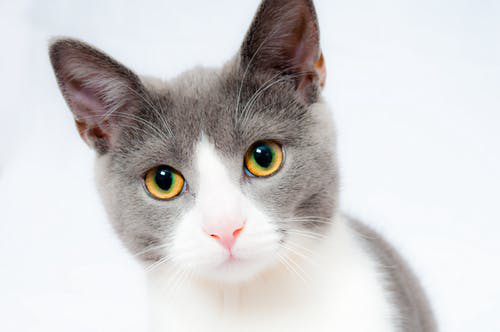

In [10]:
from PIL import Image, ImageDraw
from typing import Tuple

yellow=(255, 255, 0)
red=(255, 0, 0)

infile = "cat.jpg"
img = Image.open(infile)
img

In [2]:
img.size

(500, 332)

In [3]:
img_width = img.size[0]
img_height = img.size[1]

In [9]:
## Using relative position in image

def draw_box(draw : ImageDraw, 
             box : Tuple[float, float, float, float], 
             img_width : int, 
             img_height : int, 
             text: str = "", 
             color=(255, 255, 0)):

    """
    Draw a bounding box on and image.
    The bounding box is defined by the tuple (y_min, x_min, y_max, x_max) 
    where the coordinates are floats in the range [0.0, 1.0] and 
    relative to the width and height of the  image.
    
    For example, if an image is 100 x 200 pixels (height x width) and the bounding
    box is `[0.1, 0.2, 0.5, 0.9]`, the upper-left and bottom-right coordinates of
    the bounding box will be `(40, 10)` to `(180, 50)` (in (x,y) coordinates).
    
    Parts of the bounding box may fall outside the image.
    """
    line_width = 5
    y_min, x_min, y_max, x_max = box
    (left, right, top, bottom) = (
        x_min * img_width,
        x_max * img_width,
        y_min * img_height,
        y_max * img_height,
    )
    draw.line(
        [(left, top), (left, bottom), (right, bottom), (right, top), (left, top)],
        width=line_width,
        fill=color,
    )
    if text:
        draw.text((left + line_width, abs(top - line_width)), text, fill=color)

In [5]:
y_min=0
y_max=0.5
x_min=0
x_max=0.5

box_1 = (y_min, x_min, y_max, x_max)
box_1

(0, 0, 0.5, 0.5)

In [6]:
draw = ImageDraw.Draw(img)

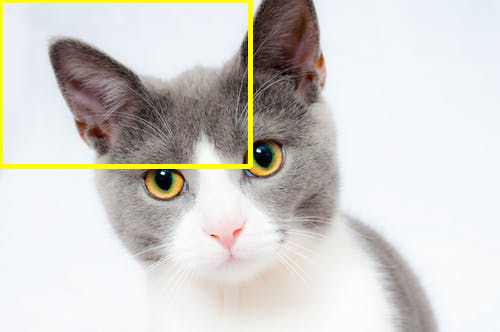

In [7]:
draw_box(draw, box_1, img_width, img_height, color=yellow)

img

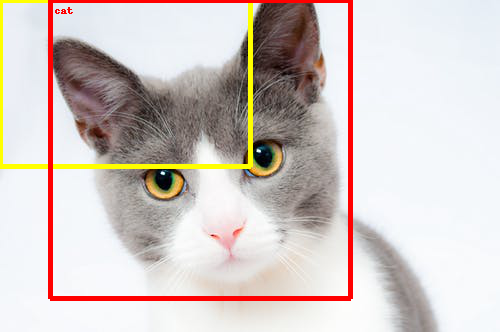

In [8]:
y_min=0
y_max=0.9
x_min=0.1
x_max=0.7

box_2 = (y_min, x_min, y_max, x_max)
box_2

draw_box(draw, box_2, img_width, img_height, text="cat", color=red)

img